In [1]:
import pandas as pa

## Exercice 1

In [2]:
data = {"Chiffre d'affaires": [220, 280, 250, 170, 150, 340, 310, 210, 180, 190],
"Frais publicitaires": [2.6, 2.6, 2.4, 1.5, 0.9, 3.0, 2.7, 2.3, 1.7, 1.9]}

df = pa.DataFrame(data)

df

,Chiffre d'affaires,Frais publicitaires
0,220,2.6
1,280,2.6
2,250,2.4
3,170,1.5
4,150,0.9
5,340,3.0
6,310,2.7
7,210,2.3
8,180,1.7
9,190,1.9


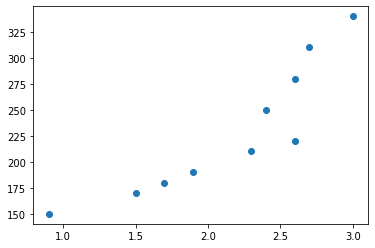

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

Y = data["Chiffre d'affaires"]
X = data["Frais publicitaires"]

plt.scatter(X, Y)

In [4]:
import numpy as np
# COEFficient de CORRélation linéaire.
np.corrcoef(X, Y)

array([[1.        , 0.89375779],
       [0.89375779, 1.        ]])

In [5]:
from scipy.stats import linregress

lr = linregress(X, Y) # LINear REGRESSion
lr

LinregressResult(slope=87.40701381509031, intercept=41.20085015940495, rvalue=0.8937577901006998, pvalue=0.0004894341749604697, stderr=15.50930060045945, intercept_stderr=34.825201199589735)

In [6]:
# Copy / Paste form cours_3-intro
beta_1 = np.sum((Y - np.average(Y))*(X - np.average(X))) / np.sum((X-np.average(X))*(X-np.average(X)))
beta_1 # slope

87.40701381509031

In [7]:
# Copy / Paste form cours_3-intro
beta_0 = np.average(Y) - beta_1 * np.average(X)
beta_0 # intercept

41.20085015940495

In [8]:
lr.rvalue # coefficient de determination // le poursentagen de relation entre x et y

0.8937577901006998

In [9]:
lr.pvalue # le pourcentage d'erreur

0.0004894341749604697

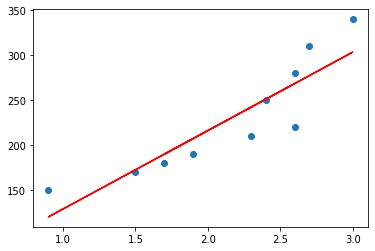

In [10]:
# Copy / Paste form cours_3-intro
plt.scatter(X, Y)
plt.plot(X, lr.intercept + lr.slope * np.array(X), 'r')
#  [beta_0 + beta_1 * X[i] for i in range(len(X))]

In [11]:
from scipy.stats import t # t-distribution
# df : Degrees of Freedom
# ppf : Percent Point Function
tinv = lambda probability, df: abs(t.ppf(probability/2, df))
#tinv : ?
ts = tinv(0.05, len(X)-2)
ts # ts : ?


2.306004135033371

Selon le theorem de la saucisse on vois que la significativité de la régression au risque 5% n'as pas de sens car la pvalue est a 0.0004 ? ou 2.3 ?

In [12]:
# C'est la rvalue
lr.rvalue

0.8937577901006998

In [13]:
beta_0 + beta_1 * 0.4 # pour 400 euro

76.16365568544109

In [14]:
beta_0 + beta_1 * 4 # pour 4000 euro

390.8289054197662

## Exercice 2

In [15]:
dataset = pa.read_csv("https://www.labri.fr/~zemmari/datasets/proprietes.csv", sep=";")
df = pa.DataFrame(dataset)
df.head()

,Valeur Totale,Valeur Terrain,Acre,Pied2,Extérieur,Chauffage,Pièces,Chambre,SbainsC,Sbains,Foyers,Garage
0,199657,63247,"1,63",1726,Good,NatGas,8,4,2,1,2,Garage
1,78482,38091,"0,495",1184,Good,NatGas,6,2,1,0,0,NoGarage
2,119962,37665,"0,375",1014,Good,Electric,7,3,2,0,1,Garage
3,116492,54062,"0,981",1260,Average,Electric,6,3,2,0,1,Garage
4,131263,61546,"1,14",1314,Average,NatGas,8,4,2,1,2,NoGarage


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Valeur Totale   79 non-null     int64 
 1   Valeur Terrain  79 non-null     int64 
 2   Acre            79 non-null     object
 3   Pied2           79 non-null     int64 
 4   Extérieur       79 non-null     object
 5   Chauffage       79 non-null     object
 6   Pièces          79 non-null     int64 
 7   Chambre         79 non-null     int64 
 8   SbainsC         79 non-null     int64 
 9   Sbains          79 non-null     int64 
 10  Foyers          79 non-null     int64 
 11  Garage          79 non-null     object
dtypes: int64(8), object(4)
memory usage: 7.5+ KB


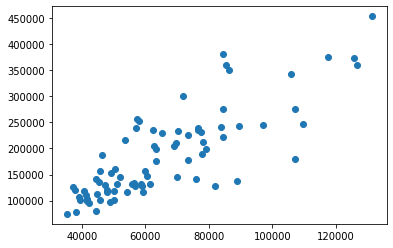

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

X = df["Valeur Terrain"]
Y = df["Valeur Totale"]

plt.scatter(X, Y)

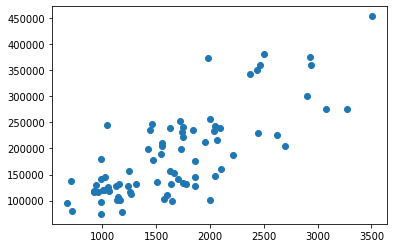

In [18]:
plt.scatter(df["Pied2"], df["Valeur Totale"])

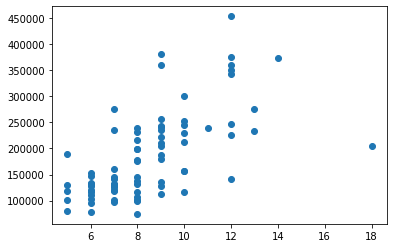

In [19]:
plt.scatter(df["Pièces"], df["Valeur Totale"])

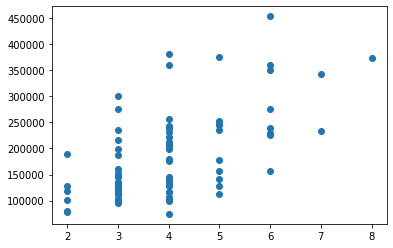

In [20]:
plt.scatter(df["Chambre"], df["Valeur Totale"])

In [22]:
df.corr()

,Valeur Totale,Valeur Terrain,Pied2,Pièces,Chambre,SbainsC,Sbains,Foyers
Valeur Totale,1.000000,0.814685,0.766510,0.626500,0.582365,0.626234,0.435950,0.547980
Valeur Terrain,0.814685,1.000000,0.515980,0.517940,0.497388,0.505859,0.235842,0.496970
Pied2,0.766510,0.515980,1.000000,0.562823,0.431150,0.457476,0.353999,0.364592
Pièces,0.626500,0.517940,0.562823,1.000000,0.790934,0.479091,0.488519,0.394377
Chambre,0.582365,0.497388,0.431150,0.790934,1.000000,0.585968,0.166039,0.399628
SbainsC,0.626234,0.505859,0.457476,0.479091,0.585968,1.000000,0.171758,0.485582
Sbains,0.435950,0.235842,0.353999,0.488519,0.166039,0.171758,1.000000,0.385958
Foyers,0.547980,0.496970,0.364592,0.394377,0.399628,0.485582,0.385958,1.000000


Oui il y a un lien

In [23]:
df.describe()

,Valeur Totale,Valeur Terrain,Pied2,Pièces,Chambre,SbainsC,Sbains,Foyers
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,187253.405063,65899.481013,1677.911392,8.518987,3.987342,2.240506,0.721519,1.974684
std,84401.421337,22986.951385,634.638847,2.401179,1.265860,1.283177,0.714981,1.367898
min,74365.000000,35353.000000,672.000000,5.000000,2.000000,1.000000,0.000000,0.000000
25%,123089.000000,48002.000000,1147.000000,7.000000,3.000000,1.000000,0.000000,1.000000
50%,156761.000000,59861.000000,1628.000000,8.000000,4.000000,2.000000,1.000000,2.000000
75%,235277.500000,77868.000000,2022.000000,10.000000,5.000000,3.000000,1.000000,2.500000
max,453744.000000,131224.000000,3501.000000,18.000000,8.000000,7.000000,3.000000,7.000000


In [24]:
def plr(x, y):
  X = df[x]
  Y = df[y]

  plt.scatter(X, Y)
  lr = linregress(X, Y)
  plt.plot(X, lr.intercept + lr.slope * np.array(X), 'r')

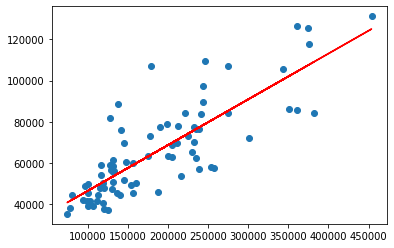

In [25]:
plr("Valeur Totale", "Valeur Terrain")

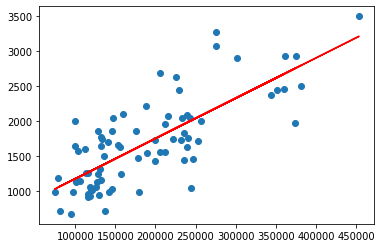

In [26]:
plr("Valeur Totale", "Pied2")

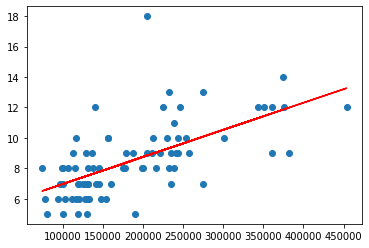

In [27]:
plr("Valeur Totale", "Pièces")

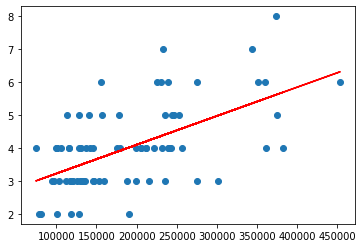

In [28]:
plr("Valeur Totale", "Chambre")

régression multiple

In [29]:
from statsmodels.regression.linear_model import OLS
m = OLS(Y,X)
results = m.fit()
su = results.summary()
su

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Valeur Totale   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              1304.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):                    1.89e-50
Time:                        18:30:49   Log-Likelihood:                         -964.84
No. Observations:                  79   AIC:                                      1932.
Df Residuals:                      78   BIC:                                      1934.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Valeur Terrain     2.8576      0.079     36.113      0.000       2.700       3.015
==============================================================================
Omnibus:                        4.935   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.468
Skew:                           0.390   Prob(JB):                        0.107
Kurtosis:                       3.866   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

idk if is good